In [1]:
from calendar import monthrange

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Data read

months = [1, 2, 3, 4, 5]
years = [2018, 2019, 2020]
contaminants = ['pm25', 'pm10', 'co', 'no2', 'o3', 'so2']

values = {}
dataframes = {}
    
for c in contaminants:
    for m in months:
        for y in years:            
            k = f"{y}-{c}"
            if k not in values:
                values[k] = []
            path = f"measurements/{y}-{m:02d}-{c}.xlsx"
            dataframes[k] = pd.read_excel(path, index_col=0, skiprows=4)
            values[k].extend(dataframes[k].loc['광진구']
                             [1:monthrange(y, m)[1] + 1].values)

# Day-of-week and NaN correction
for c in contaminants:
    v2018 = values[f"2018-{c}"]
    v2019 = values[f"2019-{c}"]
    v2020 = values[f"2020-{c}"]
    
    values[f"2018-{c}"] = a = v2018[2:]
    values[f"2019-{c}"] = b = v2019[1:-1]
    values[f"2020-{c}"] = c =v2020[:-3]
    
    assert(len(a) == len(b) == len(c))

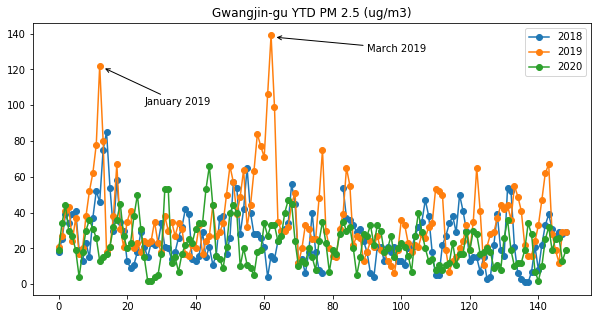

2018 var, mean, std: nan nan nan
2019 var, mean, std: 457.1504887167245 35.38926174496644 21.381077819341208
2020 var, mean, std: 144.28305031304893 22.684563758389263 12.011787973197368


In [3]:
# PM 2.5
v2018 = values["2018-pm25"]
v2019 = values["2019-pm25"]
v2020 = values["2020-pm25"]

# Plot
plt.figure(figsize=(10, 5))
plt.title('Gwangjin-gu YTD PM 2.5 (ug/m3)')
p2018, = plt.plot(v2018, marker='o')
p2019, = plt.plot(v2019, marker='o')
p2020, = plt.plot(v2020, marker='o')
plt.legend([p2018, p2019, p2020], ["2018", "2019", "2020"])

# 조선일보 김효인, 숨 막혔던 3월… 미세먼지 농도 가장 높았다
# https://news.chosun.com/site/data/html_dir/2019/04/02/2019040200218.html
plt.annotate('March 2019', (63, 138),
             arrowprops={'arrowstyle': '->'}, xytext=(90, 130))
plt.annotate('January 2019', (13, 121),
             arrowprops={'arrowstyle': '->'}, xytext=(25, 100))
plt.show()

print("2018 var, mean, std:", np.var(v2018), np.mean(v2018), np.std(v2018))
print("2019 var, mean, std:", np.var(v2019), np.mean(v2019), np.std(v2019))
print("2020 var, mean, std:", np.var(v2020), np.mean(v2020), np.std(v2020))

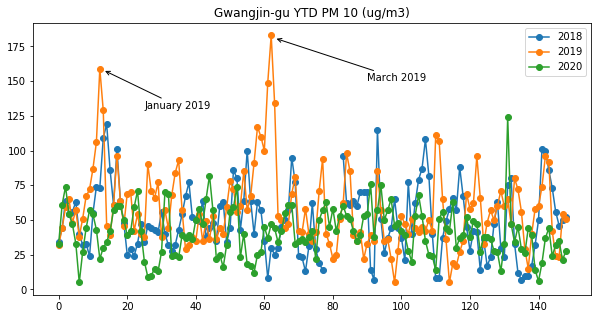

2018 var, mean, std: nan nan nan
2019 var, mean, std: 806.518535201117 57.73154362416108 28.399269976552514
2020 var, mean, std: 306.7127606864555 41.41610738255034 17.513216742976017


In [4]:
# PM 10
v2018 = values["2018-pm10"]
v2019 = values["2019-pm10"]
v2020 = values["2020-pm10"]

# Plot
plt.figure(figsize=(10, 5))
plt.title('Gwangjin-gu YTD PM 10 (ug/m3)')
p2018, = plt.plot(v2018, marker='o')
p2019, = plt.plot(v2019, marker='o')
p2020, = plt.plot(v2020, marker='o')
plt.legend([p2018, p2019, p2020], ["2018", "2019", "2020"])

# 조선일보 김효인, 숨 막혔던 3월… 미세먼지 농도 가장 높았다
# https://news.chosun.com/site/data/html_dir/2019/04/02/2019040200218.html
plt.annotate('March 2019', (63, 181),
             arrowprops={'arrowstyle': '->'}, xytext=(90, 150))
plt.annotate('January 2019', (13, 158),
             arrowprops={'arrowstyle': '->'}, xytext=(25, 130))
plt.show()

print("2018 var, mean, std:", np.var(v2018), np.mean(v2018), np.std(v2018))
print("2019 var, mean, std:", np.var(v2019), np.mean(v2019), np.std(v2019))
print("2020 var, mean, std:", np.var(v2020), np.mean(v2020), np.std(v2020))

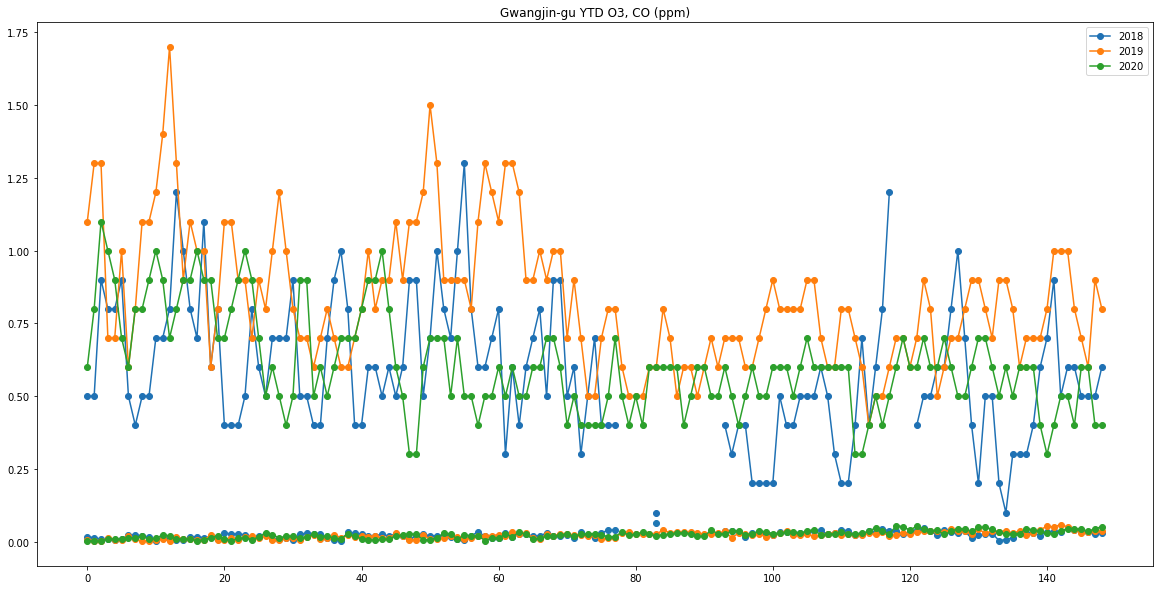

In [5]:
plt.figure(figsize=(20, 10))
plt.title('Gwangjin-gu YTD O3, CO (ppm)')

v2018 = values["2018-o3"]
v2019 = values["2019-o3"]
v2020 = values["2020-o3"]
p2018, = plt.plot(v2018, marker='o', color="#1f77b4")
p2019, = plt.plot(v2019, marker='o', color="#ff7f0e")
p2020, = plt.plot(v2020, marker='o', color="#2ca02c")
v2018 = values["2018-co"]
v2019 = values["2019-co"]
v2020 = values["2020-co"]
p2018, = plt.plot(v2018, marker='o', color="#1f71b4")
p2019, = plt.plot(v2019, marker='o', color="#ff7f0e")
p2020, = plt.plot(v2020, marker='o', color="#2ca02c")
plt.legend([p2018, p2019, p2020], ["2018", "2019", "2020"])
plt.show()

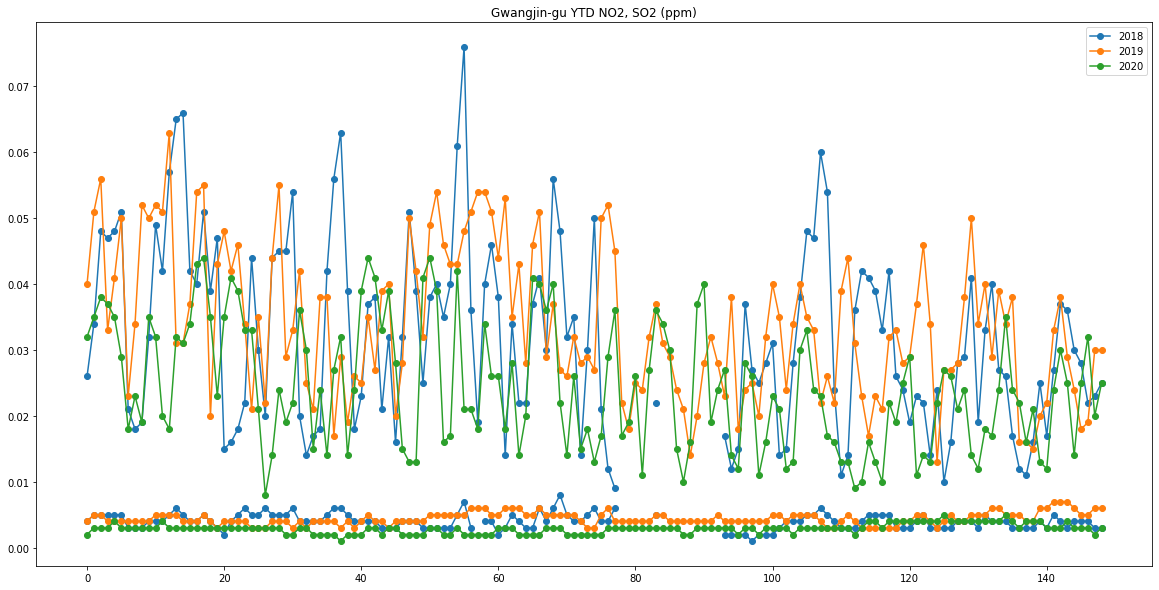

In [6]:
plt.figure(figsize=(20, 10))
plt.title('Gwangjin-gu YTD NO2, SO2 (ppm)')

v2018 = values["2018-no2"]
v2019 = values["2019-no2"]
v2020 = values["2020-no2"]
p2018, = plt.plot(v2018, marker='o', color="#1f77b4")
p2019, = plt.plot(v2019, marker='o', color="#ff7f0e")
p2020, = plt.plot(v2020, marker='o', color="#2ca02c")
v2018 = values["2018-so2"]
v2019 = values["2019-so2"]
v2020 = values["2020-so2"]
p2018, = plt.plot(v2018, marker='o', color="#1f77b4")
p2019, = plt.plot(v2019, marker='o', color="#ff7f0e")
p2020, = plt.plot(v2020, marker='o', color="#2ca02c")
plt.legend([p2018, p2019, p2020], ["2018", "2019", "2020"])
plt.show()